# Summary of data regarding classes

In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
with open('../data/Anno/list_eval_partition.txt','r') as fp:
    trainPartition = [ l.rstrip('\n') for l in fp ][2:]
    trainPartition = [ l.split()[0] for l in trainPartition \
                      if l.split()[1] == 'train' or \
                         l.split()[1] == 'test']
                      #if l.split()[1] == 'val']

In [3]:
with open('../data/Anno/list_category_cloth.txt','r') as fp:
    lines = [ l.rstrip().replace('1','upper') \
                        .replace('2','lower') \
                        .replace('3','full').split() for l in fp][2:]  
    mainCatagories = { l[0]:l[1] for l in lines}

In [4]:
classCount = {}
for sImg in trainPartition:
    className = sImg.split('/')[1].split('_')[-1]
    if classCount.get(className) is None: 
        classCount[className] = 0
    classCount[className] += 1

In [5]:
names = sorted(classCount.items(),key=lambda kv: kv[1])
namesSorted = [ v[0] for v in names]
valuesSorted = [ v[1] for v in names]
colorSorted = []
for n in namesSorted:
    color =      'red'  if mainCatagories[n] == 'upper' \
            else 'blue' if mainCatagories[n] == 'lower' \
            else 'green'
    colorSorted.append(color)

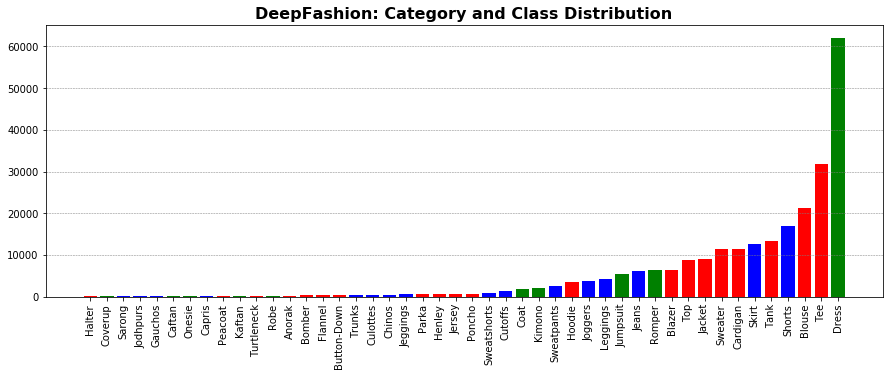

In [22]:
plt.figure(figsize=(15,5))
plt.bar(range(len(valuesSorted)),valuesSorted,color=colorSorted)
plt.xticks(range(len(valuesSorted)),namesSorted,rotation='vertical')
plt.title('DeepFashion: Category and Class Distribution',{'fontsize':16,'fontweight':'bold'})
plt.grid(color='grey',axis='y',linestyle='--', linewidth=0.5)
plt.show()

In [64]:
print('class upper=',list(mainCatagories.values()).count('upper'))
print('class lower=',list(mainCatagories.values()).count('lower'))
print('class full=',list(mainCatagories.values()).count('full'))

class upper= 20
class lower= 16
class full= 14


In [9]:
upperClass = { k for k,v in mainCatagories.items() if v == 'upper'}
lowerClass = { k for k,v in mainCatagories.items() if v == 'lower'}
fullClass  = { k for k,v in mainCatagories.items() if v == 'full'}

In [10]:
print('number of upperClass=',len(upperClass))
print('number of lowerClass=',len(lowerClass))
print('number of fullClass =',len(fullClass))

number of upperClass= 20
number of lowerClass= 16
number of fullClass = 14


In [12]:
trainPartition

['img/Sheer_Pleated-Front_Blouse/img_00000001.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000002.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000004.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000005.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000007.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000008.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000009.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000010.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000011.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000012.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000013.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000014.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000016.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000017.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000018.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000019.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000020.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000021.jpg',
 'img/Sheer_Pleated-Front_Blouse/img_00000022.jpg',
 'img/Sheer_

---
# Resample data to achieve more consistent training series
---

In [66]:
import pandas as pd

In [99]:
trainListFile = "../dataCropSQ/Anno/upper_train_list.csv"
trainListDf = pd.read_csv(trainListFile,names=['x_col','y_col'],skiprows=1,skipinitialspace=True)

In [100]:
len(trainListDf.y_col.unique())

20

In [15]:
help(plt.grid)

Help on function grid in module matplotlib.pyplot:

grid(b=None, which='major', axis='both', **kwargs)
    Configure the grid lines.
    
    Parameters
    ----------
    b : bool or None
        Whether to show the grid lines. If any *kwargs* are supplied,
        it is assumed you want the grid on and *b* will be set to True.
    
        If *b* is *None* and there are no *kwargs*, this toggles the
        visibility of the lines.
    
    which : {'major', 'minor', 'both'}
        The grid lines to apply the changes on.
    
    axis : {'both', 'x', 'y'}
        The axis to apply the changes on.
    
    **kwargs : `.Line2D` properties
        Define the line properties of the grid, e.g.::
    
            grid(color='r', linestyle='-', linewidth=2)
    
        Valid *kwargs* are
    
          agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
      alpha: float
      animated: bool
      antialiased: bool
      clip